# Paket Prabayar Manakah yang Lebih Baik?

# Konten
<span style = 'color:green'>
    
1. Paket Prabayar Makanakah yang lebih baik?
    
    1.1 Inisialisasi
    
    1.2 Memuat Data
    
    1.3 Mempersiapkan Data
    
    1.4 Paket Prabayar
    
    1.5 Memperbaiki Data
    
    1.6 Memperkaya Kualitas Data
    
    1.7 Pengguna
        
        1.7.1 Memperbaiki Data
        
        1.7.2 Memperkaya Kualitas Data
    
    1.8 Panggilan
        
        1.8.1 Memperbaiki Data
        
        1.8.2 Memperkaya Kualitas Data
    
    1.9 SMS
    
        1.9.1 Memperbaiki Data
        
        1.9.2 Memperkaya Kualitas Data
    
    1.10 Internet
        
        1.10.1 Memperbaiki Data
        
        1.10.2 Memperkaya Kualitas Data
    
    1.11 Mempelajari Syarat dan Kondisi Terkait Paket Prabayar
    
    1.12 Mengagregasi Data per Pengguna
    
    1.13 Mempelajari Perilaku Pengguna
    
        1.13.1 Panggilan
        
        1.13.2 SMS
        
# Pendahuluan dan Tujuan
Sebagai seorang analis di perusahaan operator telekomunikasi bernama Megaline. Perusahaan menawarkan dua jenis paket prabayar yaitu Surf dan Ultimate. Departemen periklanan dari perusahaan ini ingin mengetahui pendapatan yang lebih banyak dihasilakn dari paket jenis yang mana, sehingga dapat membuat anggaran iklan yang sesuai. 

Tujuan dari project ini dari 500 data Megaline pada tahun 2018, melalui analisa data dapat mengetahui:
- perilaku pengguna serta paket mana yang lebih banyak menghasilkan pendapatan, 
- sehingga departemen periklanan perusahaan Megaline mendapatkan gambaran dalam membuat anggaran iklan yang sesuai.

Langkah yang dilakukan dalam menganalisa data:
1. Terdapat 5 file path, kelimanya dipelajari informasi umumnya.
2. Menyiapkan data, kemudian mengoversi data menjadi tipe data yang dibutuhkan, kemudian menemukan dan mengeliminasi kesalahan data. Setiap pengguna perlu menemukan jumlah panggilan dan menit yang digunakan per bulan, jumlah SMS per bulan, volume data per bulan, serta pendapatan bulanan dari setiap pengguna.
3. Menganalisa data, mendeskripsikan perilaku konsumen dan memvisualisaikannya melalui grafik yang sesuai.
4. Uji hipotesisnya
5. Kesimpulan yang menyeluruh.
    
</span>

## Inisialisasi

In [175]:
# Muat semua library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
from datetime import datetime, timedelta
from scipy import stats as st

## Memuat Data

In [176]:
# Muat file data ke dalam DataFrame yang berbeda
df_calls = pd.read_csv('/datasets/megaline_calls.csv')
df_internet = pd.read_csv('/datasets/megaline_internet.csv')
df_messages = pd.read_csv('/datasets/megaline_messages.csv')
df_plans = pd.read_csv('/datasets/megaline_plans.csv')
df_users = pd.read_csv('/datasets/megaline_users.csv')

## Mempersiapkan Data

In [177]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [178]:
df_calls.sample()

,id,user_id,call_date,duration
14228,1059_456,1059,2018-06-08,0.0


<span style = 'color:green'>
Data panggilan terdapat 4 kolom id, user_id, call_date, dan duration, pada data ini:
    
- Tidak ada nilai yang hilang, karena jumlah barisnya sudah sama untuk semua kolom
- Kolom call_date dapat diubah dari object menjadi datetime
</span>

In [179]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [180]:
df_internet.sample()

,id,user_id,session_date,mb_used
46223,1205_38,1205,2018-12-09,0.0


<span style = 'color:green'>
Data internet terdapat 4 kolom id, user_id, session_date, dan mb_used, pada data ini:

- Tidak ada nilai yang hilang, karena jumlah barisnya sudah sama untuk semua kolom
- Kolom session_date dapat diubah dari object menjadi datetime
</span>

In [181]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [182]:
df_messages.sample()

,id,user_id,message_date
15837,1105_36,1105,2018-12-01


<span style = 'color:green'>
Data pesan terdapat 3 kolom id, user_id, messages_date, pada data ini:

- Tidak ada nilai yang hilang, karena jumlah barisnya sudah sama untuk semua kolom
- Kolom messages_date dapat diubah dari object menjadi datetime
</span>

In [183]:
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [184]:
df_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


<span style = 'color:green'>
Data paket prabayar sesuai dengan jumlah jenis paket yaitu Surf dan Ultimate
</span>

In [185]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [186]:
df_users.sample(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
499,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN
202,1202,Osvaldo,Mayer,36,"Minneapolis-St. Paul-Bloomington, MN-WI MSA",2018-09-30,ultimate,NaN
359,1359,Sherley,Norris,33,"Colorado Springs, CO MSA",2018-02-08,surf,NaN
460,1460,Winford,Underwood,46,"Fresno, CA MSA",2018-05-28,ultimate,NaN
454,1454,Kymberly,Cohen,56,"San Antonio-New Braunfels, TX MSA",2018-05-30,ultimate,NaN


<span style = 'color:green'>

Data pengguna:
- totalnya terdiri dari 500 baris
- terdapat 8 kolom
- kolom reg_date dan churn_date dapat diubah dari object ke datetime
- terdapat nilai yang hilang di churn_date, ini menandakan pengguna masih menggunakan layanan paket saat data ini ditarik, perlu dipertimbangkan nilai pengganti NaN. Secara jumlah patut dipertahankan karena persentase NaN cukup besar yakni 93.2%
- kolom city perlu difilter untuk menentukan analisa di kota tertentu.
    
</span>

## Paket Prabayar

In [187]:
# Tampilkan informasi/rangkuman umum tentang DataFrame paket-paket prabayar
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [188]:
# Tampilkan sampel data untuk paket-paket tersebut
df_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


<span style = 'color:green'>
      
Tipe data dari plan ini sepertinya sudah sesuai dengan kolom yang mewakilinya, tidak ada nilai yang hilang. Namun untuk perubahan memungkinkan, seperti di kolom plan_name, ini memungkinkan diubah menjadi nilai kategori untuk efisiensi analisa berikutnya. Sementara kolom ini dipertahankan dulu dengan tipe object.
               
</span>

## Memperbaiki Data

<span style = 'color:green'>
      
Pada data paket prabayar, belum ada perubahan tipe data, sejauh ini sudah mewakili tipe data, seperti int dan float untuk kolom numerik.
               
</span>


## Memperkaya Kualitas Data

<span style = 'color:green'>
      
Pada tabel paket prabayar tidak ada penambahan kualitas data.
               
</span>

## Pengguna

In [189]:
# Tampilkan informasi/rangkuman umum tentang DataFrame pengguna
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [190]:
# Tampilkan sampel data pengguna
df_users.sample(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
134,1134,Shannon,Nichols,71,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-09-03,surf,NaN
447,1447,Ramon,Hester,62,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-01,surf,NaN
430,1430,Myung,Pugh,63,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-12-07,surf,NaN
15,1015,Beata,Carpenter,26,"Pittsburgh, PA MSA",2018-12-05,surf,NaN
385,1385,Nohemi,Erickson,52,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-01-19,surf,NaN


 <span style = 'color:green'>

Data pengguna:
- kolom reg_date dan churn_date dapat diubah dari object ke datetime
- terdapat nilai yang hilang di churn_date, ini menandakan pengguna masih menggunakan layanan paket saat data ini ditarik, perlu dipertimbangkan nilai pengganti NaN. Secara jumlah patut dipertahankan karena persentase NaN cukup besar yakni 93.2%.
- mempertimbangkan nilai duration yang 0.0, perlu dicheck persentase apakah nilainya cukup banyak atau tidak dalam mempengaruhi analisa selanjutnya.
    
</span>

### Memperbaiki Data

In [191]:
#Memperbaiki data pengguna di kolom reg_date diubah menjadi datetime
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'])
df_users['month'] = df_users['reg_date'].dt.to_period('M')
#Memperbaiki data pengguna di kolom churn_date diubah menjadi datetime
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'])

#Mengganti nilai hilang pada data pengguna di kolom churn_date dengan nilai tanggal random pada tahun 2018
start_date = datetime(2018, 1, 1)
end_date = datetime(2018, 12, 31)
date_range = [start_date + timedelta(days = random.randint(0, (end_date - start_date).days)) for _ in range(len(df_users))]

df_users['churn_date'].fillna(pd.Series(date_range), inplace = True)
df_users.sample(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,month
305,1305,Gwenn,Gross,18,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-05-08,surf,2018-02-23,2018-05
365,1365,Milford,Rush,19,"Grand Rapids-Kentwood, MI MSA",2018-02-09,surf,2018-04-12,2018-02
21,1021,Ricarda,Booker,37,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-21,surf,2018-05-07,2018-12
355,1355,Digna,Tyson,57,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-10-07,surf,2018-11-11,2018-10
260,1260,Alia,Aguilar,36,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-02,surf,2018-07-04,2018-12
325,1325,Cleora,Lyons,43,"Dallas-Fort Worth-Arlington, TX MSA",2018-06-26,surf,2018-01-13,2018-06
333,1333,Macy,David,57,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-11-24,ultimate,2018-06-08,2018-11
393,1393,Wilfredo,Rosa,44,"Knoxville, TN MSA",2018-10-29,surf,2018-02-10,2018-10
114,1114,Esta,Estes,55,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-07-21,surf,2018-09-08,2018-07
119,1119,Anderson,Palmer,60,"Louisville/Jefferson County, KY-IN MSA",2018-10-05,surf,2018-07-21,2018-10


In [192]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  500 non-null    datetime64[ns]
 8   month       500 non-null    period[M]     
dtypes: datetime64[ns](2), int64(2), object(4), period[M](1)
memory usage: 35.3+ KB


In [193]:
# Merapihkan data city pada data pengguna
df_users['city'].value_counts()

New York-Newark-Jersey City, NY-NJ-PA MSA          80
Los Angeles-Long Beach-Anaheim, CA MSA             29
Dallas-Fort Worth-Arlington, TX MSA                21
Chicago-Naperville-Elgin, IL-IN-WI MSA             19
Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA    17
                                                   ..
Albany-Schenectady-Troy, NY MSA                     1
Cape Coral-Fort Myers, FL MSA                       1
Stockton, CA MSA                                    1
El Paso, TX MSA                                     1
Greensboro-High Point, NC MSA                       1
Name: city, Length: 73, dtype: int64

In [194]:
# Menambah kolom city yang sudah dirapihkan
df_users['new_column_city'] = df_users['city'].str.split(', ').str[1]
df_users['new_column_city'] = df_users['new_column_city'].str.replace(' MSA', '')
df_users.sample(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,month,new_column_city
262,1262,Michelina,Hamilton,34,"Dallas-Fort Worth-Arlington, TX MSA",2018-02-09,surf,2018-05-19,2018-02,TX
166,1166,Kaycee,Bryant,26,"Baltimore-Columbia-Towson, MD MSA",2018-05-07,surf,2018-06-12,2018-05,MD
346,1346,Emmie,Gonzalez,59,"Tucson, AZ MSA",2018-04-26,ultimate,2018-04-18,2018-04,AZ
37,1037,Reena,Velazquez,20,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-11,ultimate,2018-06-15,2018-08,WA
46,1046,Beata,Hooper,67,"Boston-Cambridge-Newton, MA-NH MSA",2018-02-19,surf,2018-06-29,2018-02,MA-NH


<span style = 'color:green'>

Data pengguna:
- sudah diganti tipe datanya untuk reg_date dan churn_date menjadi tipe datetime
- jumlah baris churn_date sudah sama dengan kolom lain, artinya nilai NaN sudah diganti dengan tanggal acak di tahun 2018
    
</span>

### Memperkaya Kualitas Data

In [195]:
# Menambah kolom penanda kategori NYNJ
df_users['category_nynj'] = df_users['new_column_city'].str.contains('NY-NJ', regex=True)
df_users['category_nynj'] = df_users['category_nynj'].replace(True, 1).replace(False, 0)
df_users.sample(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,month,new_column_city,category_nynj
309,1309,Winfred,Zimmerman,19,"San Diego-Chula Vista-Carlsbad, CA MSA",2018-07-04,surf,2018-08-16,2018-07,CA,0
67,1067,Robt,Allen,37,"Grand Rapids-Kentwood, MI MSA",2018-09-24,surf,2018-11-24,2018-09,MI,0
202,1202,Osvaldo,Mayer,36,"Minneapolis-St. Paul-Bloomington, MN-WI MSA",2018-09-30,ultimate,2018-05-12,2018-09,MN-WI,0
60,1060,Denisse,Santos,53,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-04-07,surf,2018-08-20,2018-04,GA,0
195,1195,Roy,Velez,60,"Portland-Vancouver-Hillsboro, OR-WA MSA",2018-06-09,surf,2018-02-25,2018-06,OR-WA,0


<span style = 'color:green'>

Data pengguna ditambahkan dengan kolom baru untuk membersihkan data city agar lebih mudah dan sederhana dibaca (new_column_city) serta juga diberikan kolom kategori (category_nynj) untuk memudahkan nantinya saat menganalisa.
    
</span>

## Panggilan

In [196]:
# Tampilkan informasi/rangkuman umum tentang DataFrame panggilan
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [197]:
# Tampilkan sampel data berisi panggilan
df_calls.sample(10)

,id,user_id,call_date,duration
36907,1140_191,1140,2018-08-13,10.79
67117,1240_975,1240,2018-10-05,5.42
66690,1240_548,1240,2018-08-14,7.98
115899,1406_125,1406,2018-12-13,0.87
74364,1263_348,1263,2018-04-22,4.62
50772,1183_116,1183,2018-11-30,9.12
53453,1192_215,1192,2018-12-13,4.48
98188,1352_615,1352,2018-11-06,6.07
21630,1079_343,1079,2018-10-03,0.70
118959,1415_7,1415,2018-08-19,7.15


 <span style = 'color:green'>
Data panggilan terdapat 4 kolom id, user_id, call_date, dan duration, pada data ini kolom call_date dapat diubah dari object menjadi datetime
</span>

### Memperbaiki Data

In [198]:
# Memperbaiki data calls di kolom call_date diubah dari object menjadi datetime
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'])
df_calls['month'] = df_calls['call_date'].dt.to_period('M')
df_calls['duration'] = np.ceil(df_calls['duration'])
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
 4   month      137735 non-null  period[M]     
dtypes: datetime64[ns](1), float64(1), int64(1), object(1), period[M](1)
memory usage: 5.3+ MB


### Memperkaya Kualitas Data

In [199]:
# Memeriksa durasi panggilan dengan durasi 0.0 menit
zero_duration = (df_calls['duration']==0.0).sum()/ df_calls['duration'].shape[0]*100
zero_duration

19.482339274694162

<span style = 'color:green'>

- Terdapat 137735 panggilan pengguna

- Terdapat durasi panggilan 0.0 menit sebanyak 19.48%, sementara data ini tetap dipertahankan, memungkinkan durasi ini terjadi karena panggilan tidak berhasil diangkat oleh penerima.
</span>

## Pesan/SMS

In [200]:
# Tampilkan informasi/rangkuman umum tentang DataFrame SMS
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [201]:
# Tampilkan sampel data untuk SMS
df_messages.sample(5)

,id,user_id,message_date
48643,1326_180,1326,2018-08-29
71343,1465_343,1465,2018-07-22
65379,1419_188,1419,2018-11-29
71842,1467_174,1467,2018-09-10
13723,1091_40,1091,2018-10-24


 <span style = 'color:green'>
Data pesan terdapat 3 kolom id, user_id, messages_date, pada data ini:

- Kolom messages_date dapat diubah dari object menjadi datetime
</span>

### Memperbaiki Data

In [202]:
#Memperbaiki data pesan di kolom messages_date diubah menjadi datetime
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'])

In [203]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


<span style = 'color:green'>
Kolom messages_date sudah menjadi tipe data datetime
</span>

### Memperkaya Kualitas Data

In [204]:
# kolom baru untuk mengubah message_date untuk menyimpan bulan
df_messages['month'] = df_messages['message_date'].dt.to_period('M')
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
 3   month         76051 non-null  period[M]     
dtypes: datetime64[ns](1), int64(1), object(1), period[M](1)
memory usage: 2.3+ MB


<span style = 'color:green'>
Data pesan ditambahkan kolom month, untuk memudahkan dalam menganalisa selanjutnya dalam mengamati perilaku pengguna.

</span>

## Internet

In [205]:
# Tampilkan informasi/rangkuman umum tentang DataFrame internet
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [206]:
# Tampilkan sampel data untuk traffic internet
df_internet.sample(5)

,id,user_id,session_date,mb_used
56629,1256_256,1256,2018-11-10,1053.83
15183,1068_299,1068,2018-09-07,146.90
35574,1160_278,1160,2018-05-29,391.51
52847,1238_81,1238,2018-12-03,238.44
29114,1133_110,1133,2018-09-22,417.56


<span style = 'color:green'>
Data internet terdapat 4 kolom id, user_id, session_date, dan mb_used, pada data ini:

- Kolom session_date dapat diubah dari object menjadi datetime
</span>

### Memperbaiki Data

In [207]:
#Memperbaiki data internet di kolom session_date diubah menjadi datetime
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'])
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


<span style = 'color:green'>
Kolom session_date sudah menjadi tipe data datetime dan menambah serta membulatkan kolom gb_used
</span>

### Memperkaya Kualitas Data

In [208]:
df_internet['month'] = df_internet['session_date'].dt.to_period('M')
df_internet['gb_used'] = df_internet['mb_used'] / 1024 # mengonversi dari MB ke GB
df_internet['gb_used'] = np.ceil(df_internet['gb_used']) # membulatkan kolom gb_used
df_internet.describe()

,user_id,mb_used,gb_used
count,104825.000000,104825.000000,104825.000000
mean,1242.496361,366.713701,0.884512
std,142.053913,277.170542,0.365323
min,1000.000000,0.000000,0.000000
25%,1122.000000,136.080000,1.000000
50%,1236.000000,343.980000,1.000000
75%,1367.000000,554.610000,1.000000
max,1499.000000,1693.470000,2.000000


<span style = 'color:green'>
Dari data internet berdasarkan deskripsi statistik ditemukan:
    
1. Pengguna mencakup dari user_id 1000 hingga 1499.
2. Pemakaian dalam MB rata-rata sebesar 366.7MB per bulan dengan pemakaian terendah 0MB (ada yang tidak menggunakan data internet dan tertingginya adalah 1693.4MB.
3. Pemakaian dalam GB rata-rata sebesar 0.88GB dengan pemakaian terendah adalah 0GB dan tertinggi adalah 2GB.
4. Standar deviasi baik dalam pemakaian MB ataupun GB menunjukkan variasi dalam penggunaan internet per bulan

</span>

## Mempelajari Syarat dan Kondisi Terkait Paket Prabayar

In [209]:
# Tampilkan persyaratan paket prabayar dan pastikan Anda memahaminya
df_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [210]:
# Transform mb per month menjadi gb per month
df_plans['gb_per_month_included'] = df_plans['mb_per_month_included'] / 1024

# Hapus kolom yang tidak dibutuhkan
df_plans.drop('mb_per_month_included', axis=1, inplace=True)
df_plans

,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,500,20,10,0.03,0.03,surf,15.0
1,1000,3000,70,7,0.01,0.01,ultimate,30.0


## Mengagregasi Data per Pengguna


In [211]:
# Hitung jumlah panggilan yang dilakukan oleh setiap pengguna per bulan. Simpan hasilnya.
total_calls = pd.pivot_table(df_calls, index=['user_id', 'month'], values='duration', aggfunc='sum').reset_index()
total_calls


,user_id,month,duration
0,1000,2018-12,124.0
1,1001,2018-08,182.0
2,1001,2018-09,315.0
3,1001,2018-10,393.0
4,1001,2018-11,426.0
...,...,...,...
2253,1498,2018-12,339.0
2254,1499,2018-09,346.0
2255,1499,2018-10,385.0
2256,1499,2018-11,308.0


In [212]:
# Hitung jumlah SMS yang dikirim oleh setiap pengguna per bulan. Simpan hasilnya.
total_messages = pd.pivot_table(df_messages, values='id', index=['user_id', 'month'], aggfunc='count').reset_index()
total_messages.columns = ['user_id', 'month', 'total_messages']
total_messages.head()


,user_id,month,total_messages
0,1000,2018-12,11
1,1001,2018-08,30
2,1001,2018-09,44
3,1001,2018-10,53
4,1001,2018-11,36


In [213]:
# Hitung volume traffic internet yang digunakan oleh setiap pengguna per bulan. Simpan hasilnya.
volume_data_month = pd.pivot_table(df_internet, values='mb_used', index=['user_id', 'month'], aggfunc='sum').reset_index()
volume_data_month['gb_used'] = np.ceil(volume_data_month['mb_used'] / 1024)
volume_data_month

,user_id,month,mb_used,gb_used
0,1000,2018-12,1901.47,2.0
1,1001,2018-08,6919.15,7.0
2,1001,2018-09,13314.82,14.0
3,1001,2018-10,22330.49,22.0
4,1001,2018-11,18504.30,19.0
...,...,...,...,...
2272,1498,2018-12,23137.69,23.0
2273,1499,2018-09,12984.76,13.0
2274,1499,2018-10,19492.43,20.0
2275,1499,2018-11,16813.83,17.0


In [214]:
# Membuang kolom yang tidak dibutuhkan pada df_users untuk memudahkan analisa
df_users.drop(['first_name', 'last_name', 'city'], axis=1, inplace=True)
df_users.sample()

,user_id,age,reg_date,plan,churn_date,month,new_column_city,category_nynj
74,1074,69,2018-11-26,ultimate,2018-04-18,2018-11,TN,0


In [215]:
# Gabungkan data panggilan, menit, SMS, dan internet berdasarkan user_id dan month (bulan)
grouped = total_calls.merge(total_messages, how='outer', on=['user_id', 'month'])
grouped = grouped.merge(volume_data_month, how='outer', on=['user_id', 'month'])
grouped.sample(5)


,user_id,month,duration,total_messages,mb_used,gb_used
1036,1223,2018-09,649.0,27.0,20408.31,20.0
1545,1340,2018-10,441.0,62.0,NaN,NaN
2247,1498,2018-06,238.0,NaN,14807.18,15.0
1203,1259,2018-09,147.0,34.0,3282.23,4.0
186,1046,2018-10,576.0,27.0,25833.19,26.0


In [216]:
# Menggabungkan users dengan plans
plans_users = df_users.merge(df_plans, how='left', left_on='plan', right_on='plan_name').drop('plan_name', axis=1)
plans_users.sample(5)

,user_id,age,reg_date,plan,churn_date,month,new_column_city,category_nynj,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included
148,1148,67,2018-11-04,surf,2018-01-07,2018-11,SC,0,50,500,20,10,0.03,0.03,15.0
291,1291,65,2018-01-29,surf,2018-07-31,2018-01,IN,0,50,500,20,10,0.03,0.03,15.0
430,1430,63,2018-12-07,surf,2018-01-06,2018-12,NY-NJ-PA,1,50,500,20,10,0.03,0.03,15.0
247,1247,75,2018-04-12,ultimate,2018-07-04,2018-04,CA,0,1000,3000,70,7,0.01,0.01,30.0
188,1188,31,2018-01-10,ultimate,2018-12-14,2018-01,VA,0,1000,3000,70,7,0.01,0.01,30.0


In [217]:
# Hilangkan kolom yang dtidak diperlukan
plans_users.drop(['reg_date', 'churn_date'], axis=1, inplace=True)
plans_users.sample(5)

,user_id,age,plan,month,new_column_city,category_nynj,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included
498,1498,51,surf,2018-02,NY-NJ-PA,1,50,500,20,10,0.03,0.03,15.0
78,1078,47,surf,2018-02,WA,0,50,500,20,10,0.03,0.03,15.0
236,1236,74,ultimate,2018-04,MN-WI,0,1000,3000,70,7,0.01,0.01,30.0
201,1201,61,surf,2018-06,CT,0,50,500,20,10,0.03,0.03,15.0
86,1086,36,ultimate,2018-01,NY-NJ-PA,1,1000,3000,70,7,0.01,0.01,30.0


In [218]:
# Menggabungkan semua data
df_new = grouped.merge(plans_users, how='outer', on=['user_id', 'month'])
df_new.sample(5)

,user_id,month,duration,total_messages,mb_used,gb_used,age,plan,new_column_city,category_nynj,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included
1302,1284,2018-12,965.0,NaN,21317.66,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1484,1329,2018-09,1219.0,91.0,26519.82,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1390,1311,2018-07,299.0,NaN,24800.73,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
850,1182,2018-06,301.0,4.0,18311.61,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
790,1170,2018-09,90.0,3.0,7189.24,8.0,18.0,surf,PA,0.0,50.0,500.0,20.0,10.0,0.03,0.03,15.0


In [219]:
report = df_new.isna().sum().to_frame()
report = report.rename(columns = {0: 'missing_values'})
report['% of total'] = (report['missing_values'] / df_new.shape[0]).round(2)
report.sort_values(by = 'missing_values', ascending = False)

,missing_values,% of total
new_column_city,2046,0.80
category_nynj,2046,0.80
usd_per_minute,2046,0.80
usd_per_message,2046,0.80
usd_per_gb,2046,0.80
usd_monthly_pay,2046,0.80
minutes_included,2046,0.80
messages_included,2046,0.80
gb_per_month_included,2046,0.80
plan,2046,0.80


In [220]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2546 entries, 0 to 2545
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype    
---  ------                 --------------  -----    
 0   user_id                2546 non-null   int64    
 1   month                  2546 non-null   period[M]
 2   duration               2258 non-null   float64  
 3   total_messages         1806 non-null   float64  
 4   mb_used                2277 non-null   float64  
 5   gb_used                2277 non-null   float64  
 6   age                    500 non-null    float64  
 7   plan                   500 non-null    object   
 8   new_column_city        500 non-null    object   
 9   category_nynj          500 non-null    float64  
 10  messages_included      500 non-null    float64  
 11  minutes_included       500 non-null    float64  
 12  usd_monthly_pay        500 non-null    float64  
 13  usd_per_gb             500 non-null    float64  
 14  usd_per_message        5

In [221]:
# Isi missing value di kolom numerikal dengan 0
df_new[['duration', 'gb_used', 'total_messages']] = df_new[['duration', 'gb_used', 'total_messages']].fillna(0)


In [222]:

# Menghitung penggunaan yang melebihi batas paket gratis untuk panggilan, pesan teks, dan data
df_new['minutes_excess'] = (df_new['duration'] - df_new['minutes_included'])* df_new['usd_per_minute']
df_new['messages_excess'] = (df_new['total_messages'] - df_new['messages_included'])* df_new['usd_per_message']
df_new['data_excess'] = ((df_new['gb_used']) - df_new['gb_per_month_included'])* df_new['usd_per_gb']

# Harga minus artinya adalah tidak berlebihan dan harus diganti 0
df_new.loc[df_new['minutes_excess'] < 0, 'minutes_excess'] = 0
df_new.loc[df_new['messages_excess'] < 0, 'messages_excess'] = 0
df_new.loc[df_new['data_excess'] < 0, 'data_excess'] = 0

# Menjumlahkan biaya dari data di atas dengan biaya bulanan yang sesuai dengan jenis paket panggilan
df_new['monthly_revenue'] = df_new['usd_monthly_pay'] + df_new['minutes_excess'] + df_new['messages_excess'] + df_new['data_excess']
df_new.sample(5)


,user_id,month,duration,total_messages,mb_used,gb_used,age,plan,new_column_city,category_nynj,...,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,minutes_excess,messages_excess,data_excess,monthly_revenue
1149,1251,2018-05,567.0,39.0,21218.65,21.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1332,1292,2018-12,144.0,0.0,52034.66,51.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2168,1478,2018-09,445.0,17.0,19428.57,19.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,1018,2018-12,476.0,8.0,17390.55,17.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1853,1404,2018-10,668.0,16.0,23884.22,24.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<span style = 'color:green'>
Dari data internet berdasarkan deskripsi statistik ditemukan:
    
1. Rata-rata menit panggilan yang melebihi kuota adalah sekitar 1.26 menit.
2. Rata-rata pesan teks yang melebihi kuota adalah sekitar 0.14 pesan, kondisi ini memungkinkan pengguna tidak menggunakan layanan teks.
3. Rata-rata data yang melebihi pemakaian data adalah sekitar 27,895.85 MB (atau sekitar 27.23 GB).
4. Rata-rata pendapatan bulanan yang diperoleh dari pengguna adalah sekitar $27,932.96.
   
</span>

## Mempelajari Perilaku Pengguna

### Panggilan

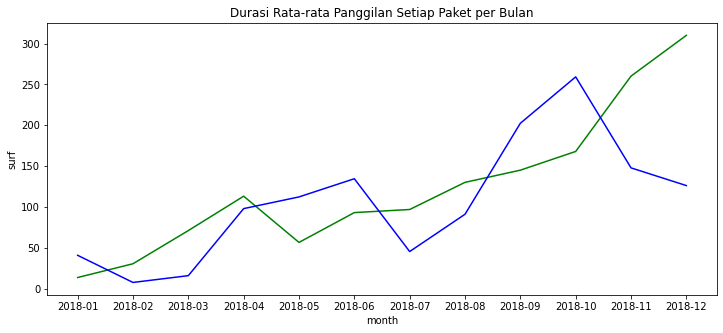

In [223]:
# Bandingkan durasi rata-rata panggilan setiap paket per bulannya. Buatlah sebuah diagram batang untuk memvisualisasikannya.
avg_call_per_plan = pd.pivot_table(df_new, columns='plan', values='duration', index='month', aggfunc='mean').reset_index()
avg_call_per_plan['month'] = avg_call_per_plan['month'].astype(str)

plt.figure(figsize=(12, 5))
plt.title('Durasi Rata-rata Panggilan Setiap Paket per Bulan')
sns.lineplot(data=avg_call_per_plan, x="month", y="surf", color='green')
sns.lineplot(data=avg_call_per_plan, x="month", y="ultimate", color='blue')
plt.show()



<span style = 'color:green'>

Pada grafik durasi rata-rata panggilan pada kedua paket cukup beragam dan nilainya berdekatan.
   
</span>

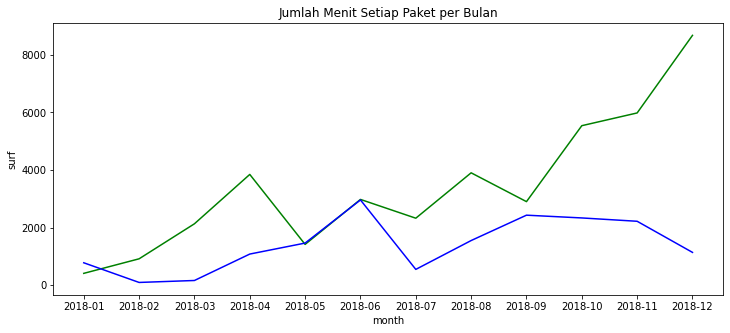

In [224]:
# Bandingkan jumlah menit yang dibutuhkan pengguna tiap paket per bulannya. Buatlah sebuah histogram.
minutes_per_plan = pd.pivot_table(df_new, columns='plan', values='duration', index='month', aggfunc='sum').reset_index()
minutes_per_plan['month'] = minutes_per_plan['month'].astype(str)

plt.figure(figsize=(12, 5))
plt.title('Jumlah Menit Setiap Paket per Bulan')
sns.lineplot(data=minutes_per_plan, x="month", y="surf", color='green')
sns.lineplot(data=minutes_per_plan, x="month", y="ultimate", color='blue')
plt.show()

<span style = 'color:green'>

Dari grafik, pengguna paket Surf lebih banyak dibandingkan dengan Ultimate.
   
</span>

In [225]:
# Hitung rata-rata dan varians dari durasi panggilan bulanan
avg_call_per_plan = pd.pivot_table(df_new, columns='plan', values='duration', index='user_id', aggfunc='mean').reset_index()

# Dapatkan user yang surf
avg_surf = avg_call_per_plan.loc[:, ['user_id', 'surf']].dropna()
avg_surf.head()


plan,user_id,surf
1,1001,182.0
2,1002,59.0
3,1003,0.0
4,1004,193.0
5,1005,0.0


In [226]:
# Dapatkan user yang Ultimate
avg_ulti = avg_call_per_plan.loc[:, ['user_id', 'ultimate']].dropna()
avg_ulti.head()

plan,user_id,ultimate
0,1000,124.0
6,1006,10.0
8,1008,0.0
11,1011,0.0
13,1013,219.0


In [227]:
# Varians dan Standar deviasi
# Surf
surf_std = round(avg_surf['surf'].std(), 1)
surf_var = round(avg_surf['surf'].var(), 1)
print('Surf:')
print(f'Standar Deviasinya {surf_std}')
print(f'Varians nya {surf_var}')
print()
ulti_std = round(avg_ulti['ultimate'].std(), 1)
ulti_var = round(avg_ulti['ultimate'].var(), 1)
# ultimate
print('Ultimate:')
print(f'Standar Deviasinya {ulti_std}')
print(f'Varians nya {ulti_var}')

Surf:
Standar Deviasinya 187.0
Varians nya 34971.8

Ultimate:
Standar Deviasinya 167.1
Varians nya 27937.1


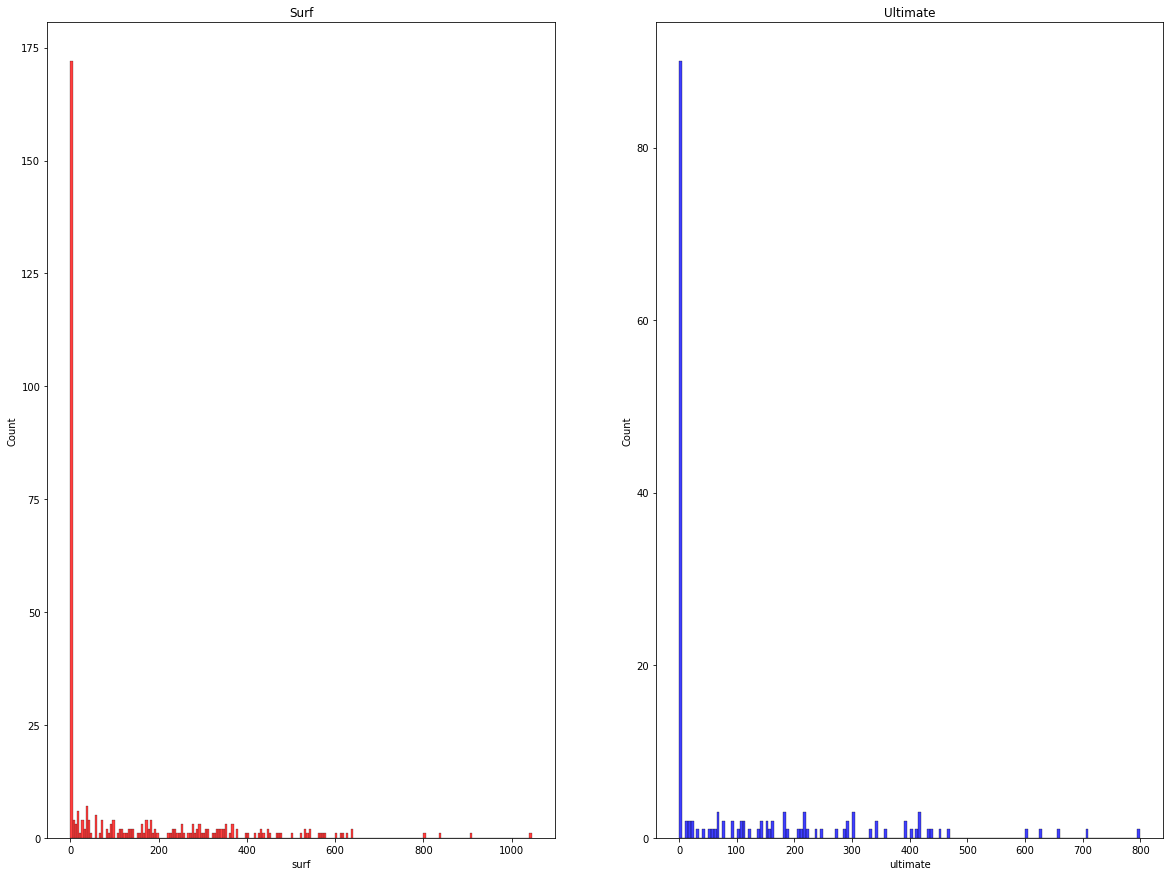

In [228]:
# Grafik untuk memvisualisasikan distribusi durasi panggilan bulanan
plt.figure(figsize=(20, 15))
plt.subplot(1, 2, 1)
plt.title('Surf')
sns.histplot(avg_call_per_plan['surf'], binwidth=5, color='red')

plt.subplot(1, 2, 2)
plt.title('Ultimate')
sns.histplot(avg_call_per_plan['ultimate'], binwidth=5, color='blue')
plt.show()

 <span style = 'color:green'>

Durasi panggilan bulanan pengguna Surf memiliki variasi yang sedikit lebih besar dibandingkan dengan pengguna Ultimate. Perbedaannya tidak terlalu besar, kondisi ini bisa menggambarkan pengguna Surf memiliki tingkat variasi yang lebih besar dalam durasi panggilan bulanan dibandingkan dengan pengguna Ultimate.
   
</span>

### Pesan/SMS

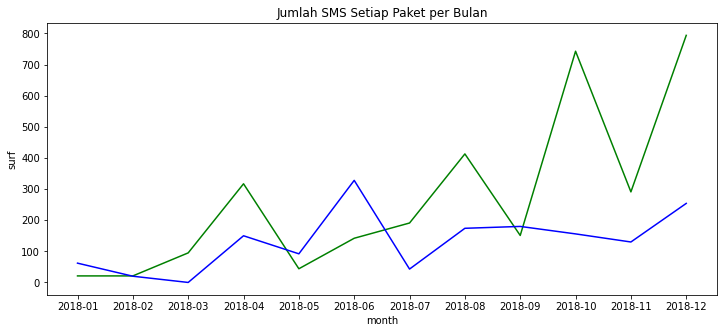

In [229]:
# Bandingkan jumlah SMS yang cenderung dikirim pengguna tiap paket per bulannya
total_messages_per_plan = pd.pivot_table(df_new, columns='plan', values='total_messages', index='month', aggfunc='sum').reset_index()
total_messages_per_plan['month'] = total_messages_per_plan['month'].astype(str)

plt.figure(figsize=(12, 5))
plt.title('Jumlah SMS Setiap Paket per Bulan')
sns.lineplot(data=total_messages_per_plan, x="month", y="surf", color='green')
sns.lineplot(data=total_messages_per_plan, x="month", y="ultimate", color='blue')
plt.show()

<span style = 'color:green'>

Pada grafik jumlah SMS paket Surf lebih banyak dibandingkan dengan jumlah SMS dari pengguna paket Ultimate .
   
</span>

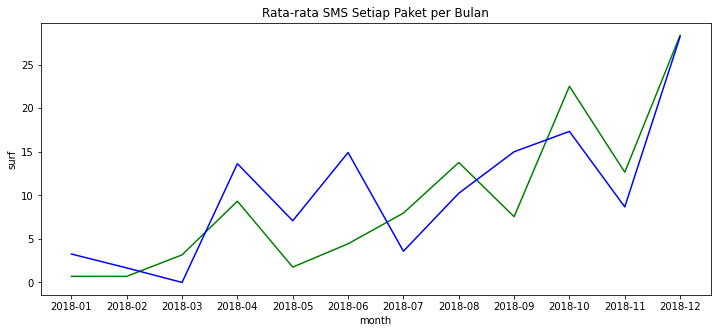

In [230]:
# Bandingkan rata-rata SMS yang dibutuhkan pengguna tiap paket per bulannya. Buatlah sebuah histogram.
avg_messages_per_plan = pd.pivot_table(df_new, index='month', columns='plan', values='total_messages', aggfunc='mean').reset_index()
avg_messages_per_plan['month'] = avg_messages_per_plan['month'].astype(str)

plt.figure(figsize=(12, 5))
plt.title('Rata-rata SMS Setiap Paket per Bulan')
sns.lineplot(data=avg_messages_per_plan, x="month", y="surf", color='green')
sns.lineplot(data=avg_messages_per_plan, x="month", y="ultimate", color='blue')
plt.show()

<span style = 'color:green'>

Pada grafik secara rata-rata jumlah SMS paket Ultimate lebih banyak dibandingkan dengan jumlah SMS dari pengguna paket Surf meskipun pengguna paket Ultimate lebih rendah dari pengguna paket Surf.
   
</span>

In [231]:
# Hitung rata-rata dan varians dari jumlah SMS bulanan
avg_user_messages = pd.pivot_table(df_new, index='user_id', columns='plan', values='total_messages', aggfunc='mean').reset_index()

# Dapatkan user yang surf
avg_surf_messages = avg_user_messages.loc[:, ['user_id', 'surf']].dropna()
avg_surf_messages.head()


plan,user_id,surf
1,1001,30.0
2,1002,15.0
3,1003,0.0
4,1004,7.0
5,1005,0.0


In [232]:
# Dapatkan user yang Ultimate
avg_ulti_messages = avg_user_messages.loc[:, ['user_id', 'ultimate']].dropna()
avg_ulti_messages.head()


plan,user_id,ultimate
0,1000,11.0
6,1006,15.0
8,1008,0.0
11,1011,0.0
13,1013,16.0


In [233]:
# Varians dan Standar deviasi
# Surf
std_surf_messages = round(avg_surf_messages['surf'].std(), 1)
var_surf_messages = round(avg_surf_messages['surf'].var(), 1)
print('Surf:')
print(f'Standar Deviasinya {std_surf_messages}')
print(f'Varians nya {var_surf_messages}')
print()
std_ulti_messages = round(avg_ulti_messages['ultimate'].std(), 1)
var_ulti_messages = round(avg_ulti_messages['ultimate'].var(), 1)
# ultimate
print('Ultimate:')
print(f'Standar Deviasinya {std_ulti_messages}')
print(f'Varians nya {var_ulti_messages}')

Surf:
Standar Deviasinya 19.8
Varians nya 392.2

Ultimate:
Standar Deviasinya 19.2
Varians nya 367.3


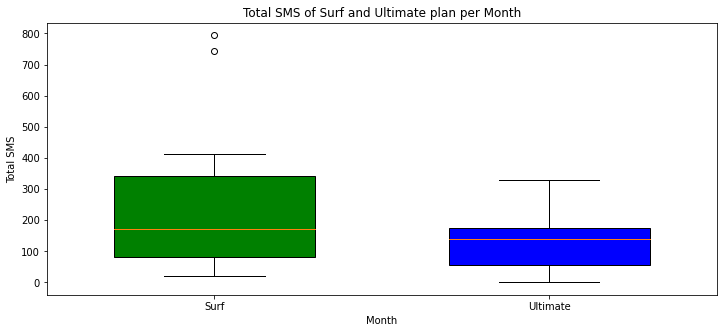

In [234]:
# Membuat grafik boxplot untuk memvisualisasikan distribusi sms bulanan

plt.figure(figsize=(12, 5))
plt.title('Total SMS of Surf and Ultimate plan per Month')

# membuat boxplot untuk plan "surf" dengan warna hijau
plt.boxplot(total_messages_per_plan['surf'], positions=[1], widths=0.6, patch_artist=True, boxprops=dict(facecolor='green'), labels=['Surf'])

# membuat boxplot untuk plan "ultimate" dengan warna biru
plt.boxplot(total_messages_per_plan['ultimate'], positions=[2], widths=0.6, patch_artist=True, boxprops=dict(facecolor='blue'), labels=['Ultimate'])
plt.xlabel('Month')
plt.ylabel('Total SMS')
plt.show()

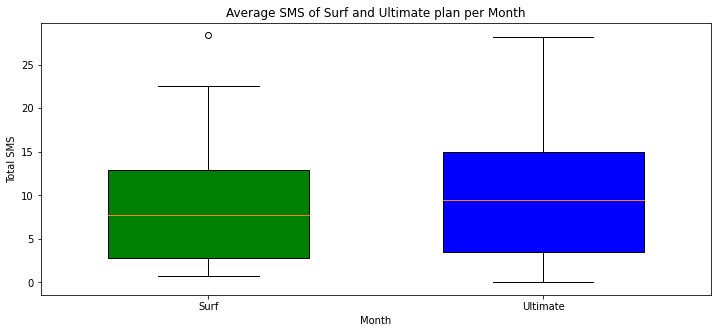

In [235]:
# Buatlah grafik boxplot untuk memvisualisasikan distribusi rata-rata sms bulanan

plt.figure(figsize=(12, 5))
plt.title('Average SMS of Surf and Ultimate plan per Month')

# membuat boxplot untuk plan "surf" dengan warna hijau
plt.boxplot(avg_messages_per_plan['surf'], positions=[1], widths=0.6, patch_artist=True, boxprops=dict(facecolor='green'), labels=['Surf'])

# membuat boxplot untuk plan "ultimate" dengan warna biru
plt.boxplot(avg_messages_per_plan['ultimate'], positions=[2], widths=0.6, patch_artist=True, boxprops=dict(facecolor='blue'), labels=['Ultimate'])
plt.xlabel('Month')
plt.ylabel('Total SMS')
plt.show()

<span style = 'color:green'>

Dari visualisasi boxplot di atas, secara total SMS paket Surf lebih banyak penggunanya, dan bila dilihat rata-rata, nilai paket Ultimate lebih tinggi, ini disebabkan pembagi dari pengguna Ultimate lebih sedikit.
   
</span>

### Internet

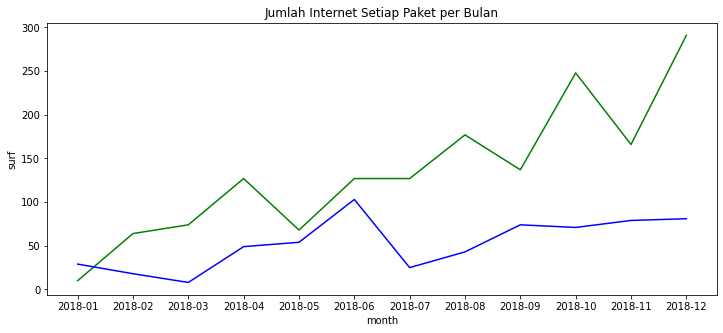

In [236]:
# Bandingkan jumlah traffic internet yang dihabiskan oleh pengguna per paket
total_internet_per_plan = pd.pivot_table(df_new, columns='plan', values='gb_used', index='month', aggfunc='sum').reset_index()
total_internet_per_plan['month'] = total_internet_per_plan['month'].astype(str)

plt.figure(figsize=(12, 5))
plt.title('Jumlah Internet Setiap Paket per Bulan')
sns.lineplot(data=total_internet_per_plan, x="month", y="surf", color='green')
sns.lineplot(data=total_internet_per_plan, x="month", y="ultimate", color='blue')
plt.show()

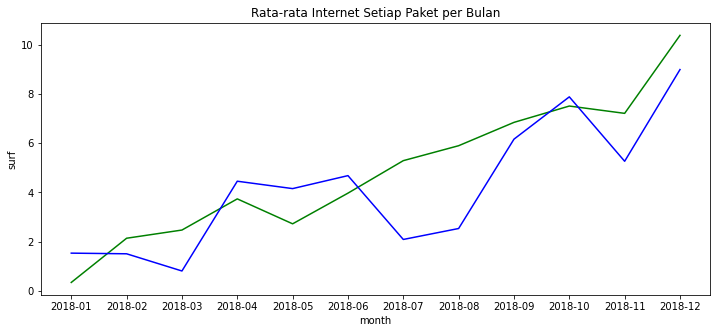

In [237]:
# Bandingkan rata-rata internet yang dibutuhkan pengguna tiap paket per bulannya. Buatlah sebuah histogram.
avg_internet_per_plan = pd.pivot_table(df_new, columns='plan', values='gb_used', index='month', aggfunc='mean').reset_index()
avg_internet_per_plan['month'] = avg_internet_per_plan['month'].astype(str)

plt.figure(figsize=(12, 5))
plt.title('Rata-rata Internet Setiap Paket per Bulan')
sns.lineplot(data=avg_internet_per_plan, x="month", y="surf", color='green')
sns.lineplot(data=avg_internet_per_plan, x="month", y="ultimate", color='blue')
plt.show()

In [238]:
# Hitung rata-rata dan varians dari jumlah internet bulanan
avg_internet_per_plan = pd.pivot_table(df_new, columns='plan', values='gb_used', index='user_id', aggfunc='mean').reset_index()

# Dapatkan user yang surf
avg_internet_surf = avg_internet_per_plan.loc[:, ['user_id', 'surf']].dropna()
avg_internet_surf.head()

plan,user_id,surf
1,1001,7.0
2,1002,7.0
3,1003,0.0
4,1004,7.0
5,1005,0.0


In [239]:
# Dapatkan user yang surf
avg_internet_ulti = avg_internet_per_plan.loc[:, ['user_id', 'ultimate']].dropna()
avg_internet_ulti.head()

plan,user_id,ultimate
0,1000,2.0
6,1006,3.0
8,1008,0.0
11,1011,0.0
13,1013,20.0


In [240]:
# varians dan standar deviasi
# surf
surf_std_internet = round(avg_internet_surf['surf'].std(), 1)
surf_var_internet = round(avg_internet_surf['surf'].var(), 1)
print('Surf:')
print(f'Standar Deviasinya {surf_std_internet}')
print(f'Varians nya {surf_var_internet}')
print()
ulti_std_internet = round(avg_internet_ulti['ultimate'].std(), 1)
ulti_var_internet = round(avg_internet_ulti['ultimate'].var(), 1)
# ultimate
print('Ultimate:')
print(f'Standar Deviasinya {ulti_std_internet}')
print(f'Varians nya {ulti_var_internet}')

Surf:
Standar Deviasinya 6.5
Varians nya 42.2

Ultimate:
Standar Deviasinya 5.6
Varians nya 31.2


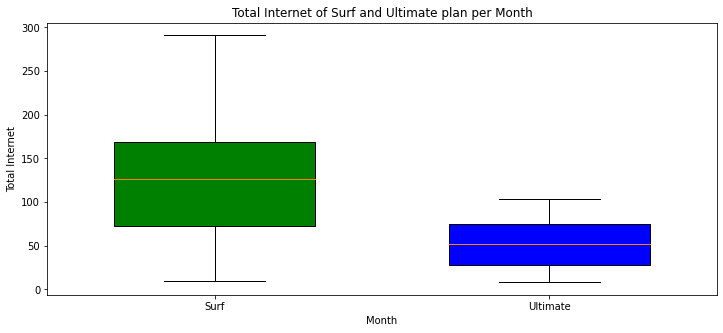

In [241]:
# Buatlah grafik boxplot untuk memvisualisasikan distribusi internet bulanan

plt.figure(figsize=(12, 5))
plt.title('Total Internet of Surf and Ultimate plan per Month')

# membuat boxplot untuk plan "surf" dengan warna hijau
plt.boxplot(total_internet_per_plan['surf'], positions=[1], widths=0.6, patch_artist=True, boxprops=dict(facecolor='green'), labels=['Surf'])

# membuat boxplot untuk plan "ultimate" dengan warna biru
plt.boxplot(total_internet_per_plan['ultimate'], positions=[2], widths=0.6, patch_artist=True, boxprops=dict(facecolor='blue'), labels=['Ultimate'])
plt.xlabel('Month')
plt.ylabel('Total Internet')
plt.show()

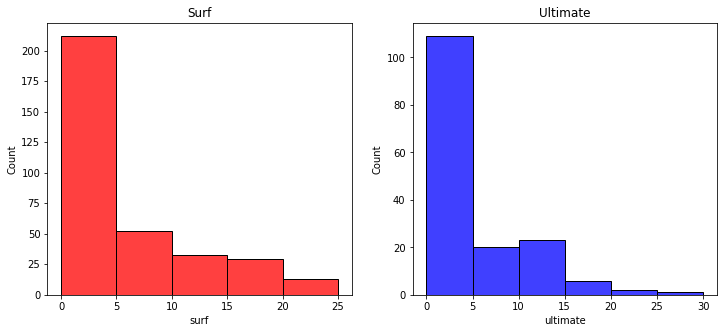

In [242]:
# Grafik untuk memvisualisasikan distribusi rata-rata internet bulanan
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title('Surf')
sns.histplot(avg_internet_surf['surf'], binwidth=5, color='red')

plt.subplot(1, 2, 2)
plt.title('Ultimate')
sns.histplot(avg_internet_ulti['ultimate'], binwidth=5, color='blue')
plt.show()

<span style = 'color:green'>

Memiliki kemiripan dengan perilaku pengguna terhadap SMS, pengguna Internet dari paket Ultimate yang jumlahnya lebih rendah dibandingkan paket Surf, pada data rata-rata internet yang digunakan kedua paket, Ultimate memiliki nilai di atas paket Surf.
   
</span>

## Pendapatan

In [243]:
# Membandingkan pendapatan oleh pengguna per paket
income_users = pd.pivot_table(df_new, index='month', columns='plan', values='monthly_revenue', aggfunc='sum').reset_index()
income_users['month'] = income_users['month'].astype(str)
income_users

plan,month,surf,ultimate
0,2018-01,600.00,1330.0
1,2018-02,710.00,840.0
2,2018-03,610.00,700.0
3,2018-04,789.86,770.0
4,2018-05,500.00,910.0
5,2018-06,810.86,1540.0
6,2018-07,634.08,840.0
7,2018-08,782.94,1190.0
8,2018-09,561.83,840.0
9,2018-10,754.56,630.0


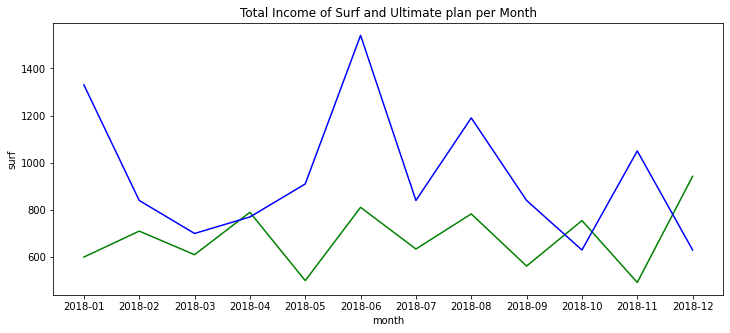

In [244]:
plt.figure(figsize=(12, 5))
plt.title('Total Income of Surf and Ultimate plan per Month')
sns.lineplot(data=income_users, x="month", y="surf", color='green')
sns.lineplot(data=income_users, x="month", y="ultimate", color='blue')
plt.show()

In [245]:
# Bandingkan rata-rata pendapatan oleh pengguna per paket (total_income)
income_avg_users = pd.pivot_table(df_new, index='month', columns='plan', values='monthly_revenue', aggfunc='mean').reset_index()
income_avg_users['month'] = income_avg_users['month'].astype(str)
income_avg_users

plan,month,surf,ultimate
0,2018-01,20.000000,70.0
1,2018-02,23.666667,70.0
2,2018-03,20.333333,70.0
3,2018-04,23.231176,70.0
4,2018-05,20.000000,70.0
5,2018-06,25.339375,70.0
6,2018-07,26.420000,70.0
7,2018-08,26.098000,70.0
8,2018-09,28.091500,70.0
9,2018-10,22.865455,70.0


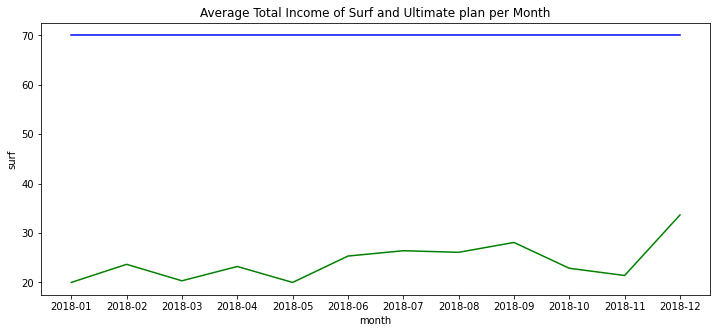

In [246]:
plt.figure(figsize=(12, 5))
plt.title('Average Total Income of Surf and Ultimate plan per Month')
sns.lineplot(data=income_avg_users, x="month", y="surf", color='green')
sns.lineplot(data=income_avg_users, x="month", y="ultimate", color='blue')
plt.show()

<span style = 'color:green'>

Dari pendapatan pengguna, paket Surf lebih tinggi peminatnya, mungkin karena harga paket lebih murah dibandingkan dengan paket Ultimate.
   
</span>

In [247]:
# menghitung data varians
# hitung rata-rata dan varians dari pendapatan bulanan
income_avg_users = pd.pivot_table(df_new, index='user_id', columns='plan', values='monthly_revenue', aggfunc='mean').reset_index()
# dapatkan user surf
avg_surf_income = income_avg_users.loc[:, ['user_id', 'surf']].dropna()
avg_surf_income.head()

plan,user_id,surf
1,1001,20.0
2,1002,20.0
3,1003,20.0
4,1004,20.0
5,1005,20.0


In [248]:
# dapatkan user ultimate
avg_ulti_income = income_avg_users.loc[:, ['user_id', 'ultimate']].dropna()
avg_ulti_income.head()

plan,user_id,ultimate
0,1000,70.0
6,1006,70.0
8,1008,70.0
11,1011,70.0
13,1013,70.0


In [249]:
# varians dan standar deviasi
# surf
surf_std_income = round(avg_surf_income['surf'].std(), 1)
surf_var_income = round(avg_surf_income['surf'].var(), 1)
print('Surf:')
print(f'Standar Deviasinya {surf_std_income}')
print(f'Varians nya {surf_var_income}')
print()
ulti_std_income = round(avg_ulti_income['ultimate'].std(), 1)
ulti_var_income = round(avg_ulti_income['ultimate'].var(), 1)
# ultimate
print('Ultimate:')
print(f'Standar Deviasinya {ulti_std_income}')
print(f'Varians nya {ulti_var_income}')

Surf:
Standar Deviasinya 14.6
Varians nya 212.6

Ultimate:
Standar Deviasinya 0.0
Varians nya 0.0


<span style = 'color:green'>

Income dari pengguna Surf memiliki variasi yang lebih besar daripada pengguna Ultimate, yang mengindikasikan tingkat konsistensi yang lebih tinggi dalam income dari pengguna Ultimate per bulan.
   
</span>

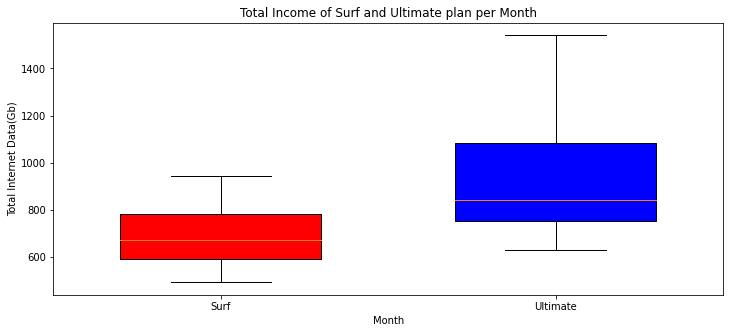

In [250]:
# Buatlah grafik boxplot untuk memvisualisasikan distribusi income bulanan
# dataframe income_sum berisi data yang akan digunakan dalam boxplot
plt.figure(figsize=(12, 5))
plt.title('Total Income of Surf and Ultimate plan per Month')

# membuat boxplot untuk plan "surf" dengan warna merah
plt.boxplot(income_users['surf'], positions=[1], widths=0.6, patch_artist=True, boxprops=dict(facecolor='red'), labels=['Surf'])

# membuat boxplot untuk plan "ultimate" dengan warna biru
plt.boxplot(income_users['ultimate'], positions=[2], widths=0.6, patch_artist=True, boxprops=dict(facecolor='blue'), labels=['Ultimate'])
plt.xlabel('Month')
plt.ylabel('Total Internet Data(Gb)')
plt.show()

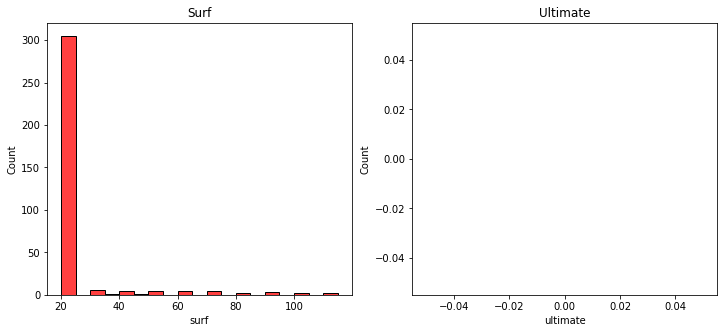

In [251]:
# Grafik untuk memvisualisasikan distribusi rata-rata income bulanan
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title('Surf')
sns.histplot(income_avg_users['surf'], binwidth=5, color='red')

plt.subplot(1, 2, 2)
plt.title('Ultimate')
sns.histplot(income_avg_users['ultimate'], binwidth=5, color='blue')
plt.show()

<span style = 'color:green'>

Nilai Varians cukup tinggi, persebaran jumlah pengguna mempengaruhi pendapatan yang dihasilkan.
   
</span>

## Menguji Hipotesis Statistik

<span style = 'color:green'>

Uji Hipotesis Pendapatan Murni
    
H0: Pendapatan rata-rata dari pengguna paket prabayar ultimate dan surf SAMA

H1: Pendapatan rata-rata dari pengguna paket prabayar ultimate dan surf BERBEDA

Alpha: 5% = 0.05
    
</span>

In [252]:
# Uji hipotesisnya
surf_income = df_new.loc[df_new['plan']=='surf', 'monthly_revenue']
surf_income

1       20.0
6       20.0
10      20.0
37      20.0
56      20.0
        ... 
2539    20.0
2541    20.0
2543    20.0
2544    20.0
2545    20.0
Name: monthly_revenue, Length: 339, dtype: float64

In [253]:
ultimate_income = df_new.loc[df_new['plan']=='ultimate', 'monthly_revenue']
ultimate_income

0       70.0
19      70.0
55      70.0
86      70.0
112     70.0
        ... 
2535    70.0
2536    70.0
2538    70.0
2540    70.0
2542    70.0
Name: monthly_revenue, Length: 161, dtype: float64

In [254]:
pvalue = st.ttest_ind(ultimate_income, surf_income, nan_policy = 'omit').pvalue

In [255]:
# Uji hipotesisnya
# H0: Pendapatan rata-rata dari pengguna paket prabayar ultimate dan surf SAMA

# H1: Pendapatan rata-rata dari pengguna paket prabayar ultimate dan surf BERBEDA
alpha = 0.05

if pvalue < alpha:
    print('Menerima H1')
else:
    print('Menerima H0')

Menerima H1


In [256]:
mean_ultimate_income = ultimate_income.mean()
mean_surf_income = surf_income.mean()

print(mean_ultimate_income, mean_surf_income)

70.0 24.15598820058997


<span style = 'color:green'>

Uji Hipotesis Pendapatan di Wilayah NY-NJ
    
H0: Pendapatan rata-rata dari pengguna paket prabayar di wilayah NY-NJ untuk ultimate dan surf SAMA

H1: Pendapatan rata-rata dari pengguna paket prabayar di wilayah NY-NJ untuk ultimate dan surf BERBEDA

Alpha: 5% = 0.05
    
</span>

In [257]:
# Uji hipotesisnya
surf_nynj_income = df_new.loc[(df_new['plan']=='surf') & (df_new['new_column_city'].str.contains('NY-NJ')), 'monthly_revenue']
surf_nynj_income.sample(5)


1614    20.0
2453    20.0
287     20.0
1966    20.0
2371    20.0
Name: monthly_revenue, dtype: float64

In [258]:
ulti_nynj_income = df_new.loc[(df_new['plan']=='ultimate') & (df_new['new_column_city'].str.contains('NY-NJ')), 'monthly_revenue']
ulti_nynj_income.sample(5)

2402    70.0
2489    70.0
659     70.0
112     70.0
2514    70.0
Name: monthly_revenue, dtype: float64

In [259]:
p_value = st.ttest_ind(ulti_nynj_income, surf_nynj_income, nan_policy = 'omit').pvalue

In [260]:
# H0: Pendapatan rata-rata dari pengguna paket di wilayah NY-NJ ultimate dan surf SAMA

# H1: Pendapatan rata-rata dari pengguna paket di wilayah NY-NJ ultimate dan surf BERBEDA

alpha = 0.05

if p_value < alpha:
    print('Menerima H1')
else:
    print('Menerima H0')

Menerima H1


In [261]:
mean_ulti_nynj_income = ulti_nynj_income.mean()
mean_surf_nynj_income = surf_nynj_income.mean()

print(mean_ulti_nynj_income, mean_surf_nynj_income)

70.0 26.690333333333335


<span style = 'color:green'>

Paket Ultimate memiliki income yang lebih besar dibandingkan Surf, namun perbedaannya tidak terlalu besar, jumlah pengguna Surf lebih banyak dapat mempengaruhi nilai income.
    
</span>

## Kesimpulan Umum


<span style = 'color:green'>

**Pendapatan:**

Pendapatan rata-rata dari paket Ultimate sebesar $70 lebih tinggi dibandingkan dengan paket Surf dengan besaran sekitar $24 dalam tahun 2018, untuk income rata-rata di wilayah NY-NJ paket Ultimate juga lebih tinggi dibandingkan dengan paket Surf
    
**Perilaku pengguna:**

Pengguna Surf lebih banyak aktifitas di SMS dan Internet, namun perbedaaan dari 3 layanan yang ditawarkan yaitu call, text, dan internet dari paket Ultimate tidak terlalu signifikan. Ultimate sedikit cenderung lebih banyak menggunakan layanan panggilan, namun di akhir tahun 2018 datanya menurun dari jumlah panggilan yang dilakukan.
    
**Insight:**

Pendapatan: Ultimate lebih menguntungkan Megaline dari sisi rata-rata pendapatan yang diperoleh.

Perilaku pengguna: Megaline dapat mengembangkan strategi pemasaran yang lebih menekankan manfaat dari paket Ultimate, termasuk panggilan, SMS, dan akses internet yang lebih cepat.
Wilayah NY-NJ dapat menjadi potensi bagus untuk pengguna kedua paket.

**Rekomendasi:**
Megaline dapat mengidentifikasi pelanggan yang cenderung beralih dari satu paket ke paket lain. Ini dapat membantu dalam mengembangkan strategi kebertahanan pelanggan dalam menggunakan paket yang dipilih.
    
</span>